In [1]:
#! pip install alminer

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import alminer
import pandas

In [26]:
#49.82143689 -0.96964645

In [29]:
myquery = alminer.conesearch(ra=49.82143689, dec=-0.96964645, point=False, search_radius=0.5)

--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['587731511545626673_8081-3704']
--------------------------------


In [30]:
myquery

,Obs,project_code,ALMA_source_name,RAJ2000,DEJ2000,ang_res_arcsec,min_freq_GHz,max_freq_GHz,central_freq_GHz,bandwidth_GHz,...,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified,pi_name
0,1,2018.1.00541.S,587731511545626673_8081-3704,49.821442,-0.969631,1.616,106.71,108.69,107.70,1.985,...,S,TARGET,T,18.5634,T,2019ApJ...884L..33L 2020ApJ...903..145L 2020MN...,"Starbursts, star formation, Surveys of galaxies",Active galaxies,2023-09-27T15:58:30.809,"Ellison, Sara"
1,2,2018.1.00541.S,587731511545626673_8081-3704,49.821442,-0.969631,1.616,96.46,98.44,97.45,1.985,...,S,TARGET,T,18.5634,T,2019ApJ...884L..33L 2020ApJ...903..145L 2020MN...,"Starbursts, star formation, Surveys of galaxies",Active galaxies,2023-09-27T15:58:30.809,"Ellison, Sara"
2,3,2018.1.00541.S,587731511545626673_8081-3704,49.821442,-0.969631,1.616,94.56,96.55,95.56,1.985,...,S,TARGET,T,18.5634,T,2019ApJ...884L..33L 2020ApJ...903..145L 2020MN...,"Starbursts, star formation, Surveys of galaxies",Active galaxies,2023-09-27T15:58:30.809,"Ellison, Sara"
3,4,2018.1.00541.S,587731511545626673_8081-3704,49.821442,-0.969631,1.616,108.44,110.31,109.38,1.871,...,S,TARGET,T,18.5634,T,2019ApJ...884L..33L 2020ApJ...903..145L 2020MN...,"Starbursts, star formation, Surveys of galaxies",Active galaxies,2023-09-27T15:58:30.809,"Ellison, Sara"


In [69]:
import pymysql
import numpy as np

#Query MySQL for mock survey statmorph results
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
#x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
x = 'SELECT DISTINCT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u, dr15_ALMA_spaxels a WHERE u.objID = a.objID AND u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
#x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47 AND u.ra > 20 and u.ra < 35'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id = np.array(db_data, dtype = str).T[0]

In [70]:
ra_sdss = data[1]
dec_sdss = data[2]
z_sdss = data[4]

In [71]:
mycat =  {"Name": table_id,
          "RAJ2000" : ra_sdss,
          "DEJ2000" : dec_sdss,
           "z": z_sdss}

mycat = pandas.DataFrame(mycat)

myquery = alminer.catalog(mycat, search_radius = 0.5)

alminer.catalog results
Target = 587731511545626673
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['587731511545626673_8081-3704']
--------------------------------
Target = 588015510364880957
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['588015510364880957_8082-6103']
--------------------------------
Target = 588015509828075649
--------------------------------
Number of projects = 2
Number of observations = 2
Number of unique subbands = 8
Total number of subbands = 8
2 target(s) with ALMA data = ['WP_8083_12703', '8083-12703']
--------------------------------
Target = 588015507657719904
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 2
Total number of subbands = 2
1 target(s) 

In [80]:
np.unique(np.array(myquery["ALMA_source_name"]))

array(['1237657190888898714', '587727221402042402_7977-3703',
       '587731173842027508_8623-6104', '587731186187632690_8616-9102',
       '587731187797393472_8615-3703', '587731511545233578_8082-12701',
       '587731511545626673_8081-3704', '587731512619696292_8084-3702',
       '587731513694355564_8155-6102', '587741421099155681_8241-3703',
       '587741490891325518_8241-3704', '587742060530696249_8450-6102',
       '588015508213989555_8077-6104', '588015508731723912_8655-9102',
       '588015510364880957_8082-6103', '7815-12705', '8077-9101',
       '8081-12703', '8081-6102', '8081-9101', '8083-12703', '8084-12705',
       '8084-6103', '8086-9101', '8155-6101', '8615-9101', '8616-6104',
       '8618-9102', '8623-12702', '8623-6104', '8655-12705', '8655-3701',
       '8728-3701', '8950-12705', '8952-12701', '8952-6104', '9194-3702',
       'CP_7968_12705', 'CP_8078_6104', 'CP_8241_12705', 'CP_9195_9101',
       'GMP3896', 'J133944.15+274635.2', 'PM1_8615_1901', 'PM1_8623_1902',
  

In [72]:
alminer.summary(myquery)

--------------------------------
Number of projects = 10
Number of observations = 61
Number of unique subbands = 190
Total number of subbands = 199
56 target(s) with ALMA data = ['587731511545626673_8081-3704', '588015510364880957_8082-6103', 'WP_8083_12703', '8083-12703', '8655-12705', '8616-6104', 'CP_7968_12705', '587741421099155681_8241-3703', '9194-3702', 'PM1_9194_3702', '8615-9101', 'WP_8616_9101', '8081-6102', '587731512619696292_8084-3702', '7815-12705', '8081-9101', 'PM1_8623_1902', '8623-12702', '587731187797393472_8615-3703', '8081-12703', 'WP_8078_12703', '8618-9102', '8084-12705', '588015508213989555_8077-6104', '587727221402042402_7977-3703', '8952-6104', 'J133944.15+274635.2', 'CP_8241_12705', 'WP_8085_3704', '587731513694355564_8155-6102', '8084-6103', '8655-3701', 'CP_9195_9101', '587731173842027508_8623-6104', '8623-6104', '587741490891325518_8241-3704', '8950-12705', 'GMP3896', 'CP_8078_6104', '588015508731723912_8655-9102', '587731186187632690_8616-9102', '12376571

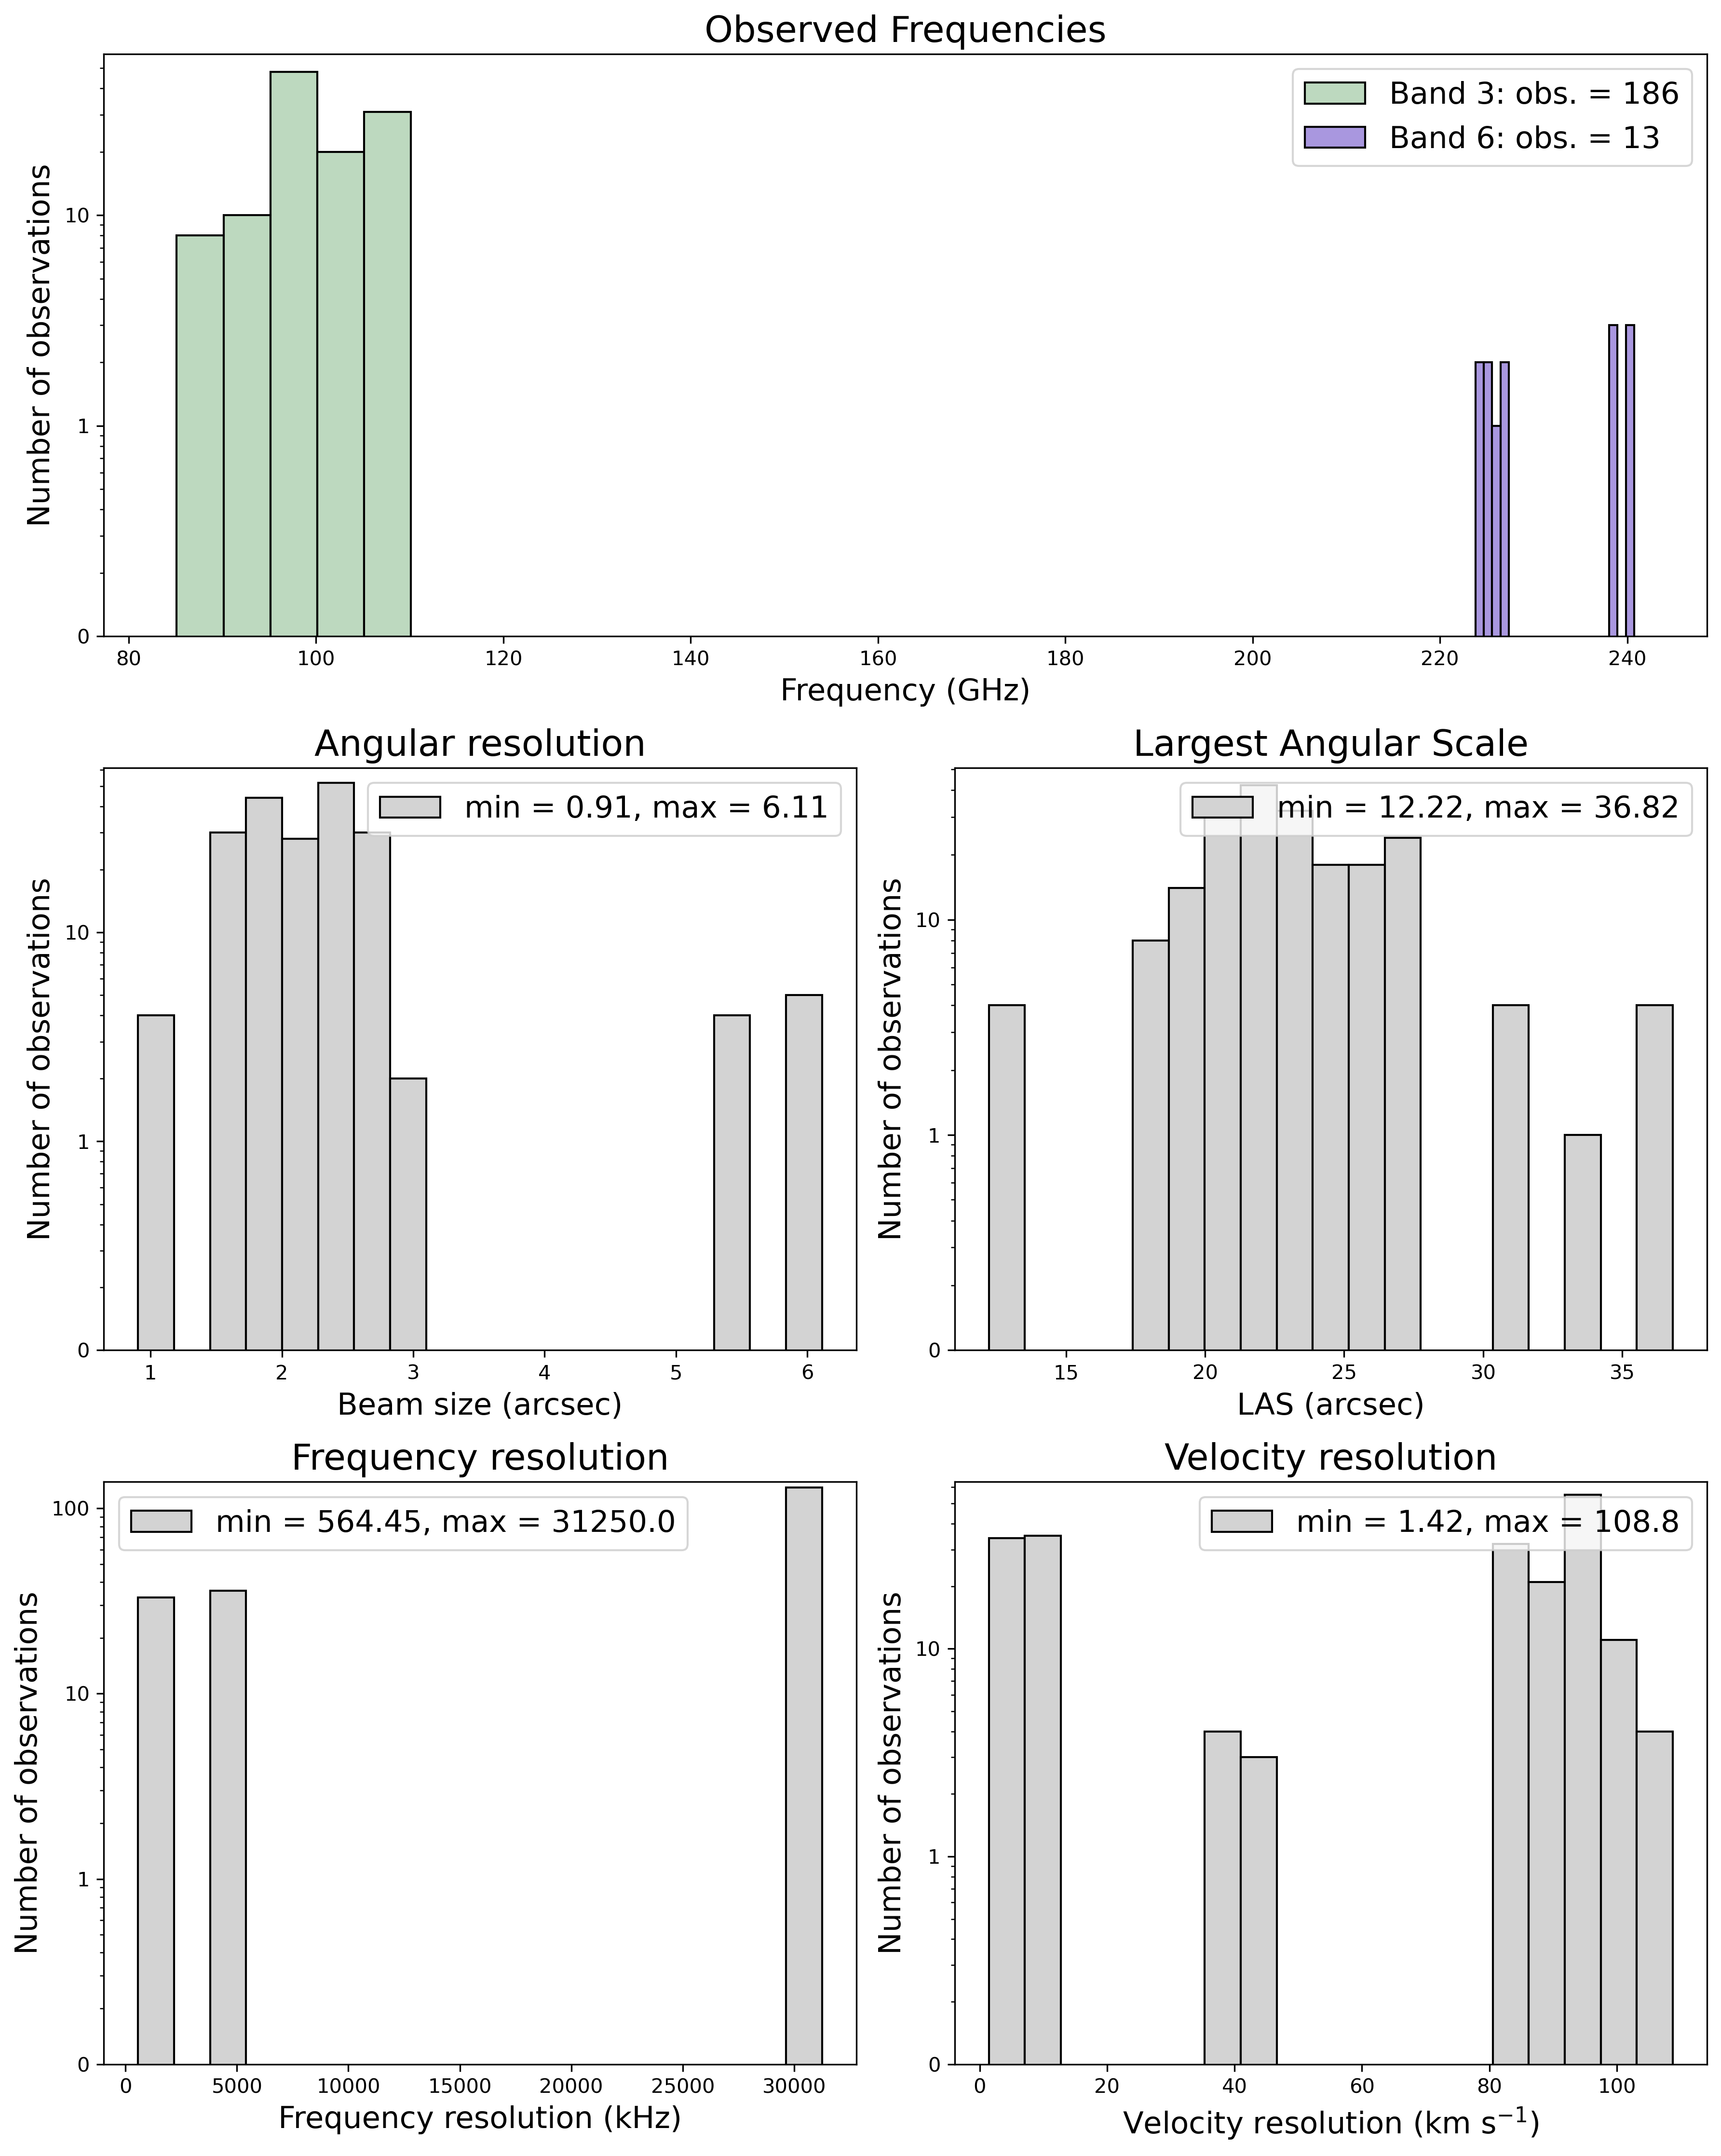

In [43]:
alminer.plot_overview(myquery)

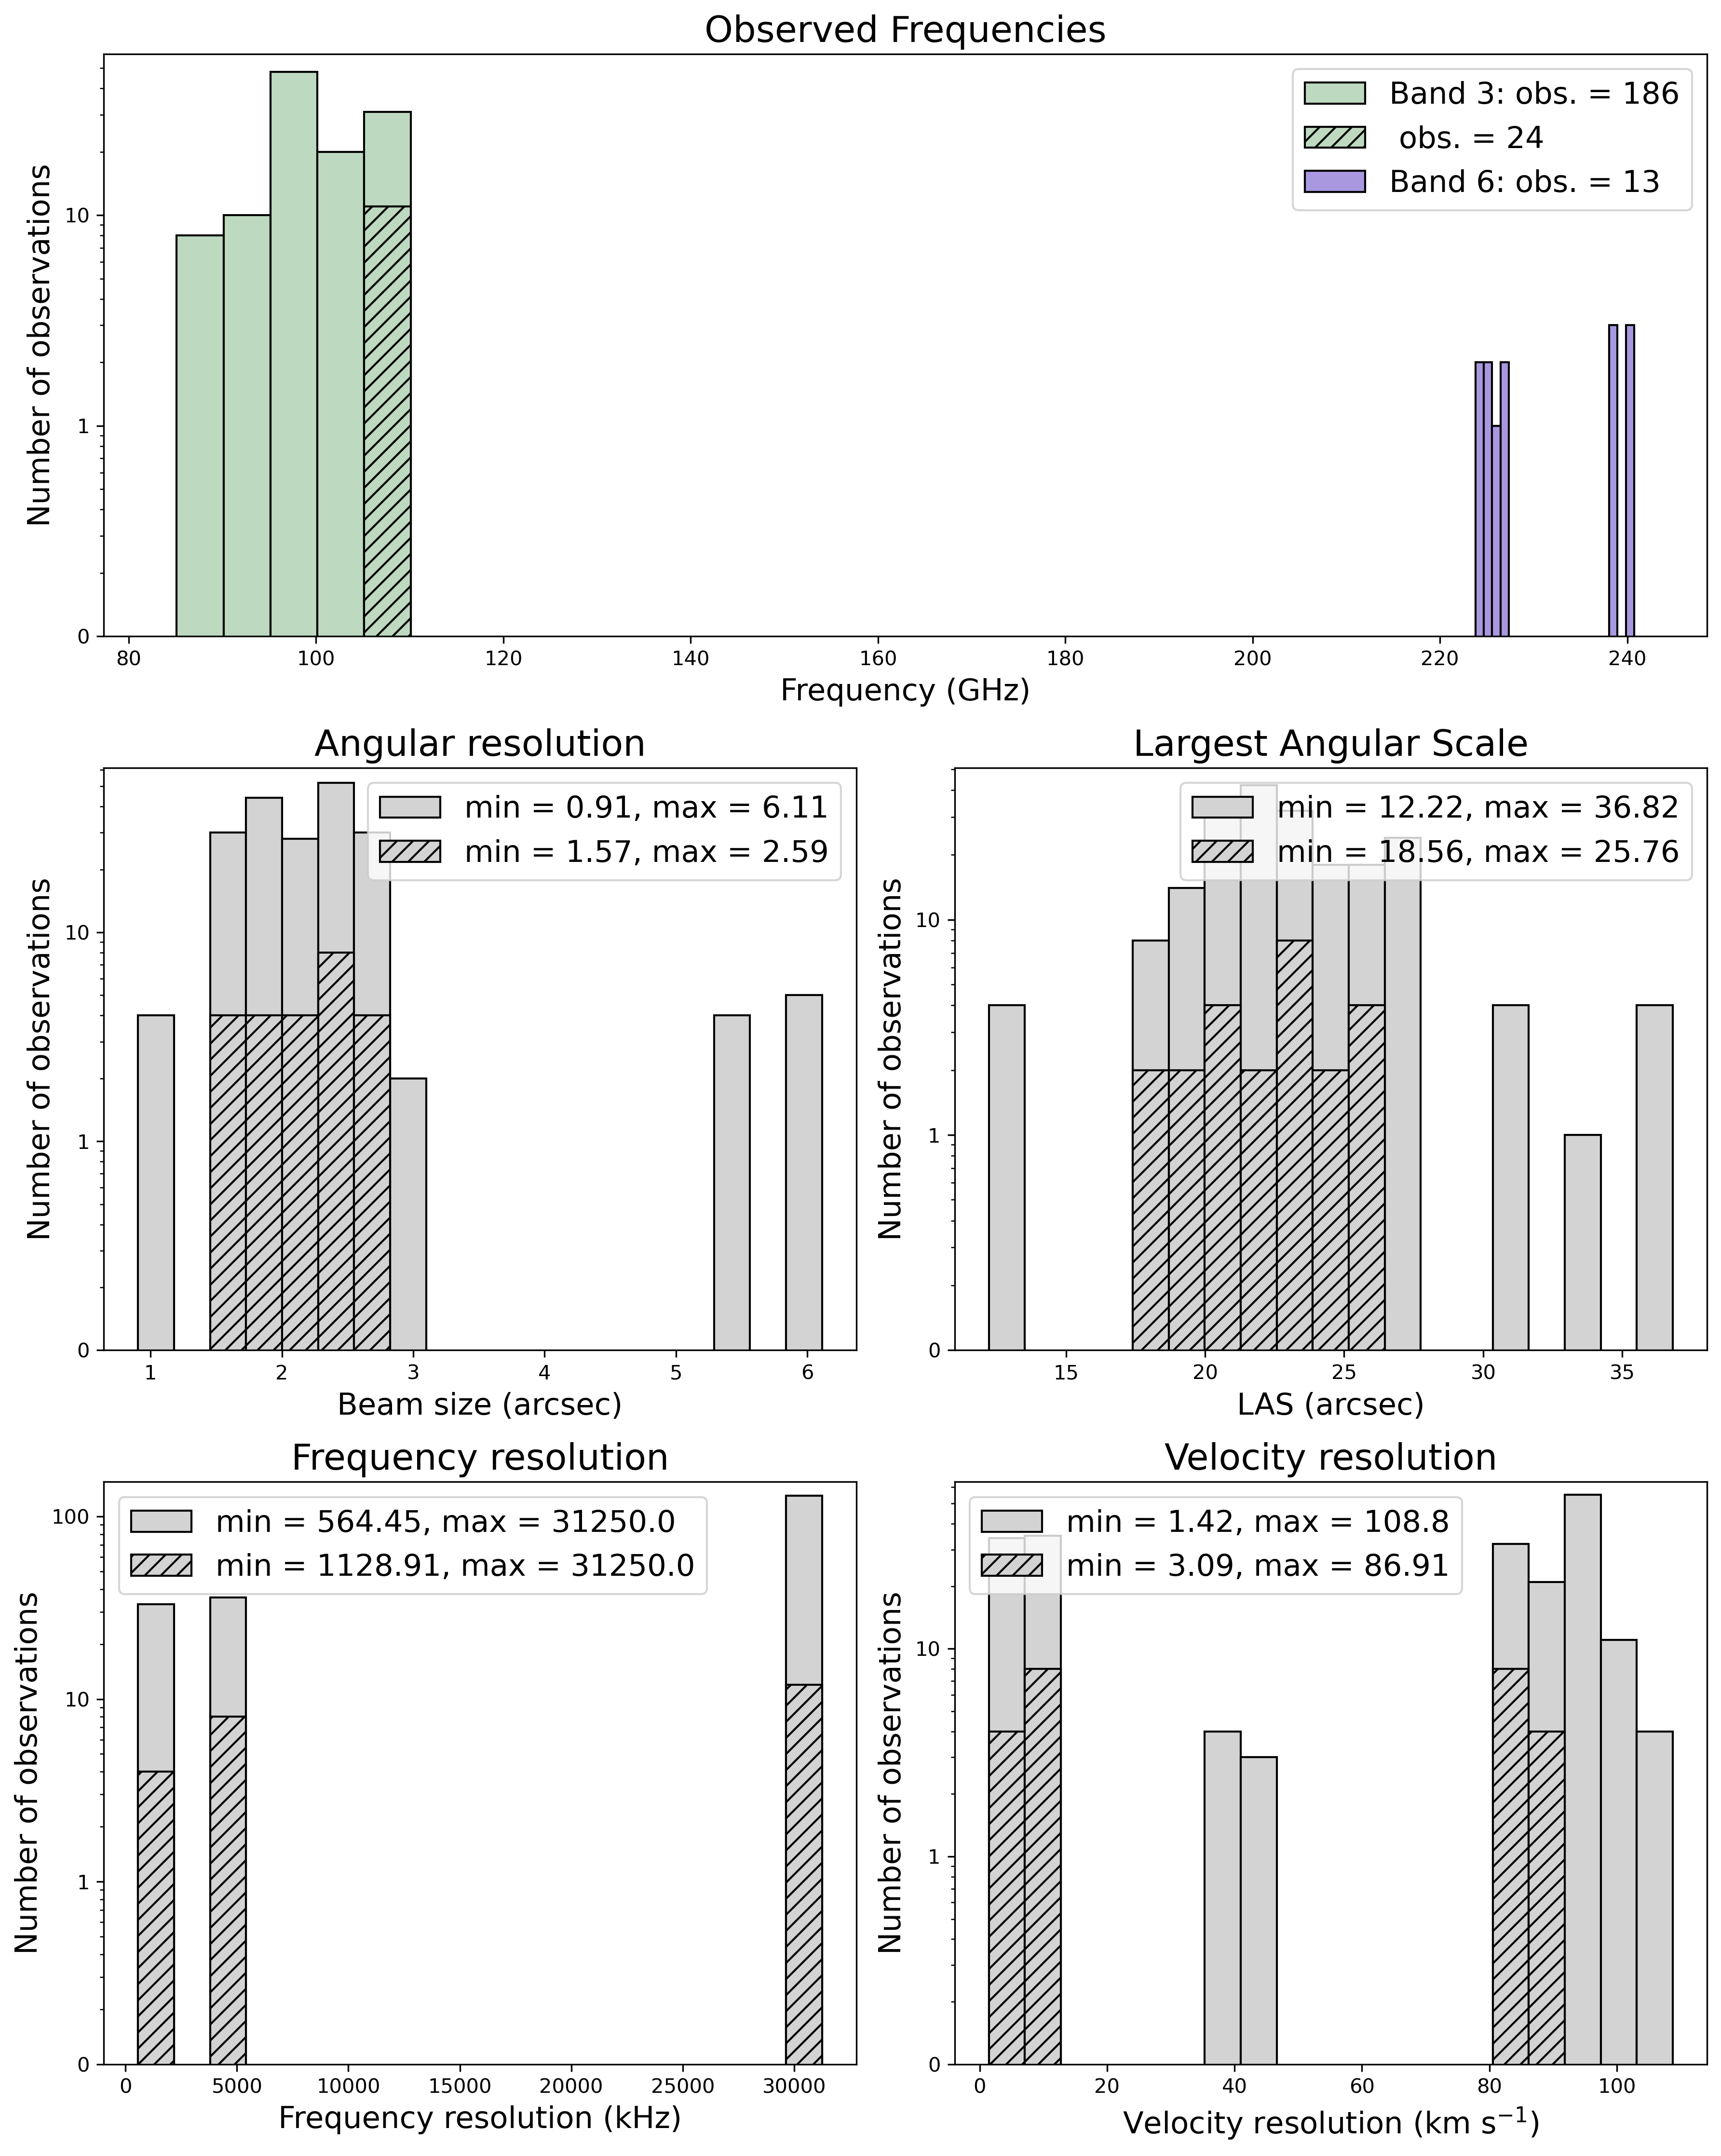

In [18]:
alminer.plot_line_overview(myquery, line_freq = 115.27120180, z = 0.05)

In [21]:
rf_12CO_10 = 115.27120180
z_min = 0.
z_max = 0.5
selected = myquery[(myquery["min_freq_GHz"] > rf_12CO_10/(1+z_max)) &
                   (myquery["max_freq_GHz"] < rf_12CO_10/(1+z_min)) &
                   (myquery["ang_res_arcsec"] < 3)]
alminer.summary(selected)

--------------------------------
Number of projects = 7
Number of observations = 57
Number of unique subbands = 179
Total number of subbands = 186
53 target(s) with ALMA data = ['587731511545626673_8081-3704', '588015510364880957_8082-6103', 'WP_8083_12703', '8083-12703', '8655-12705', '8616-6104', 'CP_7968_12705', '587741421099155681_8241-3703', 'PM1_9194_3702', '9194-3702', '8615-9101', 'WP_8616_9101', '8081-6102', '587731512619696292_8084-3702', '7815-12705', '8081-9101', 'PM1_8623_1902', '8623-12702', '587731187797393472_8615-3703', '8081-12703', 'WP_8078_12703', '8618-9102', '8084-12705', '588015508213989555_8077-6104', '587727221402042402_7977-3703', '8952-6104', 'CP_8241_12705', 'WP_8085_3704', '587731513694355564_8155-6102', '8084-6103', '8655-3701', 'CP_9195_9101', '587731173842027508_8623-6104', '8623-6104', '587741490891325518_8241-3704', '8950-12705', 'CP_8078_6104', '588015508731723912_8655-9102', '587731186187632690_8616-9102', '587731511545233578_8082-12701', '8155-6101'

In [41]:
ra_sdss

array([ 49.82143689,  49.78215908,  49.92932926, 357.65176944,
       322.98051569, 323.40752218, 126.46116245,  47.0294424 ,
       319.91975399, 322.90884307,  49.94013207,  50.63658867,
        42.46662204, 318.99043808,  47.7721595 , 312.02361024,
       310.21701687, 320.82655503,  50.39146198,  42.56064266,
       319.27145783,  51.02711718,  42.03277806, 333.05203457,
       204.93395984, 127.63198907,  51.15551055,  52.62136726,
        50.74164625, 356.75181707,  28.07921485, 311.78094669,
       126.56889413, 194.73318076,  42.73942039, 358.22185487,
       322.7494346 ,  48.89644156,  53.81411231,  27.84278643,
       332.79873079, 138.15123729,  57.24298571,  29.05220916,
       204.68382396, 171.74883903, 321.07217669,  57.69904137,
       324.89156234,  40.30388682,  41.64309665])

In [44]:
alminer.CO_lines(myquery, z=z_sdss, print_targets=False)

ValueError: ('Lengths must match to compare', (199,), (51,))

In [64]:
import pymysql
import numpy as np

#Query MySQL for mock survey statmorph results
db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47 LIMIT 5000'
#x = 'SELECT DISTINCT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u, dr15_ALMA_spaxels a WHERE u.objID = a.objID AND u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
#x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47 AND u.ra > 20 and u.ra < 35'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id = np.array(db_data, dtype = str).T[0]

In [65]:
ra_sdss = data[1]
dec_sdss = data[2]
z_sdss = data[4]

In [66]:
import time

In [67]:
mycat =  {"Name": table_id,
          "RAJ2000" : ra_sdss,
          "DEJ2000" : dec_sdss,
           "z": z_sdss}

mycat = pandas.DataFrame(mycat)

start = time.time()
myquery = alminer.catalog(mycat, search_radius = 0.5)
end = time.time()
print(f'Querying {len(mycat)} galaxies took {(start-end)/60} min.')

alminer.catalog results
Target = 587722953304310243
--------------------------------
No observations found.
--------------------------------
Target = 587722953304310184
--------------------------------
No observations found.
--------------------------------
Target = 587722953304310091
--------------------------------
No observations found.
--------------------------------
Target = 587722953304179134
--------------------------------
No observations found.
--------------------------------
Target = 587722953304179097
--------------------------------
No observations found.
--------------------------------
Target = 587722953304179083
--------------------------------
No observations found.
--------------------------------
Target = 587722953304179044
--------------------------------
No observations found.
--------------------------------
Target = 587722953304113519
--------------------------------
No observations found.
--------------------------------
Target = 587722953304047869
------------

In [68]:
alminer.summary(myquery)

--------------------------------
Number of projects = 15
Number of observations = 33
Number of unique subbands = 102
Total number of subbands = 154
27 target(s) with ALMA data = ['FJ122021.84-010827.1', 'Callisto', 'HATLAS_RED_1178', 'HATLAS1713', '105386', 'SDSS_J152224.73-004404.5', 'HATLASJ121253.5-002203', 'HATLASJ121253', 'HATLAS740', '1237648704051675158', 'HATLAS1744', 'HATLAS_RED_2207', 'HATLAS_RED_2221', 'UR7G', 'HATLAS_RED_2348', 'GAMA64646', 'HATLASJ121427.3+005819', 'HATLAS1114', 'HATLAS_J140608.2+005501', 'HATLAS1745', '1237648705664450617', 'GAMA106389', 'HATLAS_RED_2299', 'HATLAS_J143336.7+005042', 'HATLAS_RED_2428', '015028', 'PM1_9195_3702']
--------------------------------


In [58]:
rf_12CO_10 = 115.27120180 #GHz
z_min = 0.
z_max = 0.5
selected = myquery[(myquery["min_freq_GHz"] > rf_12CO_10/(1+z_max)) & 
                   (myquery["max_freq_GHz"] < rf_12CO_10/(1+z_min)) &
                   (myquery["ang_res_arcsec"] < 3)]
alminer.summary(selected)

--------------------------------
Number of projects = 6
Number of observations = 12
Number of unique subbands = 40
Total number of subbands = 64
8 target(s) with ALMA data = ['105386', 'HATLASJ121253.5-002203', 'UR7G', 'HATLASJ121427.3+005819', 'HATLAS_J140608.2+005501', 'GAMA106389', 'HATLAS_J143336.7+005042', 'PM1_9195_3702']
--------------------------------


In [61]:
rf_12CO_10 = 115.27120180 #GHz
z_min = 0.
z_max = 0.5
selected = myquery[(myquery["min_freq_GHz"] > rf_12CO_10/(1+z_max)) & 
                   (myquery["max_freq_GHz"] < rf_12CO_10/(1+z_min)) &
                   (myquery["ang_res_arcsec"] < 3) & 
                   ((myquery["scientific_category"] == 'Galaxy evolution') | 
                    (myquery["scientific_category"] == 'Active galaxies') |
                    (myquery["scientific_category"] == 'Cosmology') |
                    (myquery["scientific_category"] == 'Local Universe'))]
alminer.summary(selected)

--------------------------------
Number of projects = 6
Number of observations = 12
Number of unique subbands = 40
Total number of subbands = 64
8 target(s) with ALMA data = ['105386', 'HATLASJ121253.5-002203', 'UR7G', 'HATLASJ121427.3+005819', 'HATLAS_J140608.2+005501', 'GAMA106389', 'HATLAS_J143336.7+005042', 'PM1_9195_3702']
--------------------------------


In [62]:
rf_12CO_10 = 115.27120180 #GHz
z_min = 0.
z_max = 0.5
selected = myquery[(myquery["min_freq_GHz"] > rf_12CO_10/(1+z_max)) & 
                   (myquery["max_freq_GHz"] < rf_12CO_10/(1+z_min)) &
                   (myquery["ang_res_arcsec"] < 3) & 
                   ((myquery["scientific_category"] == 'Galaxy evolution') | 
                    (myquery["scientific_category"] == 'Active galaxies') |
                    (myquery["scientific_category"] == 'Cosmology') |
                    (myquery["scientific_category"] == 'Local Universe')) &
                   (myquery["dataproduct_type"] == 'cube')]
alminer.summary(selected)

--------------------------------
Number of projects = 6
Number of observations = 12
Number of unique subbands = 29
Total number of subbands = 50
8 target(s) with ALMA data = ['105386', 'HATLASJ121253.5-002203', 'UR7G', 'HATLASJ121427.3+005819', 'HATLAS_J140608.2+005501', 'GAMA106389', 'HATLAS_J143336.7+005042', 'PM1_9195_3702']
--------------------------------


In [63]:
rf_12CO_10 = 115.27120180 #GHz
z_min = np.min(z_sdss)
z_max = np.max(z_sdss)
selected = myquery[(myquery["min_freq_GHz"] > rf_12CO_10/(1+z_max)) & 
                   (myquery["ang_res_arcsec"] < 3) & 
                   ((myquery["scientific_category"] == 'Galaxy evolution') | 
                    (myquery["scientific_category"] == 'Active galaxies') |
                    (myquery["scientific_category"] == 'Cosmology') |
                    (myquery["scientific_category"] == 'Local Universe')) &
                   (myquery["dataproduct_type"] == 'cube')]
alminer.summary(selected)

--------------------------------
Number of projects = 6
Number of observations = 12
Number of unique subbands = 25
Total number of subbands = 44
8 target(s) with ALMA data = ['105386', 'HATLASJ121253.5-002203', 'UR7G', 'HATLASJ121427.3+005819', 'HATLAS_J140608.2+005501', 'GAMA106389', 'HATLAS_J143336.7+005042', 'PM1_9195_3702']
--------------------------------


In [60]:
myquery.keys()

Index(['Obs', 'project_code', 'ALMA_source_name', 'RAJ2000', 'DEJ2000',
       'ang_res_arcsec', 'min_freq_GHz', 'max_freq_GHz', 'central_freq_GHz',
       'bandwidth_GHz', 'freq_res_kHz', 'vel_res_kms', 'LAS_arcsec',
       'FoV_arcsec', 'cont_sens_bandwidth', 'line_sens_10kms',
       'line_sens_native', 'MOUS_id', 'collections', 'pi_userid', 'o_ucd',
       'obs_publisher_did', 'obs_collection', 'facility_name',
       'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level',
       'target_name', 's_ra', 's_dec', 's_fov', 's_region', 's_xel1', 's_xel2',
       'em_xel', 't_xel', 'pol_xel', 's_resolution', 't_min', 't_max',
       't_exptime', 't_resolution', 'em_min', 'em_max', 'em_res_power',
       'pol_states', 'access_url', 'access_format', 'access_estsize',
       'proposal_id', 'data_rights', 'gal_longitude', 'gal_latitude',
       'band_list', 'em_resolution', 'bandwidth', 'antenna_arrays',
       'is_mosaic', 'obs_release_date', 'spatial_resolution',
       'frequency